In [3]:
!mkdir ../nces_att_bound

download the files here (about 1.1GB) https://nces.ed.gov/programs/edge/SABS

In [4]:
import pandas as pd
import geopandas as gpd

ModuleNotFoundError: No module named 'pandas'

In [3]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_column', 200)

In [5]:
gdf = gpd.read_file("../nces_att_bound/SABS_1516/SABS_1516.shp")

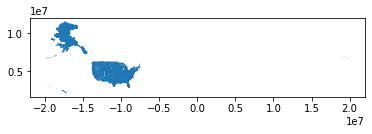

In [7]:
gdf.plot()

In [9]:
gdf.head()

,SrcName,ncessch,schnam,leaid,gslo,gshi,defacto,stAbbrev,openEnroll,Shape_Leng,Shape_Area,level,MultiBdy,geometry
0,None,010000500870,Ala Avenue Middle Sch,0100005,07,08,1,AL,0,146828.793028,1.012552e+08,2,0,"MULTIPOLYGON (((-9601421.827 4062780.032, -960..."
1,None,010000500871,Albertville High Sch,0100005,09,12,1,AL,0,146828.793028,1.012552e+08,3,0,"MULTIPOLYGON (((-9601421.827 4062780.032, -960..."
2,None,010000500879,Evans Elem Sch,0100005,05,06,1,AL,0,146828.793028,1.012552e+08,2,0,"MULTIPOLYGON (((-9601421.827 4062780.032, -960..."
3,None,010000500889,Albertville Elem Sch,0100005,03,04,1,AL,0,146828.793028,1.012552e+08,1,0,"MULTIPOLYGON (((-9601421.827 4062780.032, -960..."
4,None,010000501616,Big Spring Lake Kinderg Sch,0100005,KG,KG,1,AL,0,146828.793028,1.012552e+08,1,0,"MULTIPOLYGON (((-9601421.827 4062780.032, -960..."


no attributes here - just the shapes. Looks like some area of canada as well for Alaskan attendance zones

SABS is also available as deliniated by school types
- primary 
- middle
- high
- other

In [11]:
prim = gpd.read_file("../nces_att_bound/SABS_1516_SchoolLevels/SABS_1516_Primary.shp")

In [12]:
prim.head()

,SrcName,ncessch,schnam,leaid,gslo,gshi,defacto,stAbbrev,openEnroll,Shape_Leng,Shape_Area,level,MultiBdy,geometry
0,None,010000500889,Albertville Elem Sch,0100005,03,04,1,AL,0,146828.793028,1.012552e+08,1,0,"MULTIPOLYGON (((-9601421.827 4062780.032, -960..."
1,None,010000501616,Big Spring Lake Kinderg Sch,0100005,KG,KG,1,AL,0,146828.793028,1.012552e+08,1,0,"MULTIPOLYGON (((-9601421.827 4062780.032, -960..."
2,None,010000502150,Albertville Primary Sch,0100005,01,02,1,AL,0,146828.793028,1.012552e+08,1,0,"MULTIPOLYGON (((-9601421.827 4062780.032, -960..."
3,Trace Crossings,010000700091,Trace Crossings Elem Sch,0100007,KG,04,0,AL,0,88268.460952,3.556252e+07,1,0,"MULTIPOLYGON (((-9664084.026 3945882.210, -966..."
4,Greystone,010000700248,Greystone Elem Sch,0100007,KG,05,0,AL,0,95421.368014,2.911717e+07,1,0,"MULTIPOLYGON (((-9642276.755 3957505.672, -964..."


We can index by state.

In [13]:
caprim = prim.loc[prim['stAbbrev'] == "CA"]

In [15]:
caprim.shape

(5114, 14)

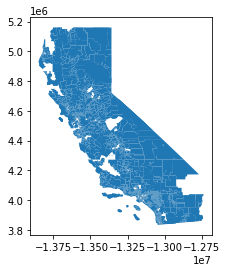

In [14]:
caprim.plot()

these are attendance zones, so missing values might not necessarily mean missing data. It might just mean that there are no elementary schools in that area. Let's look at attendance zones other school levels. 

In [16]:
other = gpd.read_file("../nces_att_bound/SABS_1516_SchoolLevels/SABS_1516_Other.shp")

In [23]:
other.head()

,SrcName,ncessch,schnam,leaid,gslo,gshi,defacto,stAbbrev,openEnroll,Shape_Leng,Shape_Area,level,MultiBdy,geometry
0,Auburn Jr High,010021000037,Auburn Jr High Sch,0100210,08,09,0,AL,0,400515.667562,2.190836e+08,4,0,"MULTIPOLYGON (((-9526945.160 3834088.124, -952..."
1,Billingsley,010024000045,Billingsley High Sch,0100240,KG,12,0,AL,0,125259.862063,6.973549e+08,4,0,"POLYGON ((-9639350.357 3856420.215, -9638165.4..."
2,Autaugaville,010024001408,Autaugaville Sch,0100240,KG,12,0,AL,0,153269.622721,7.043540e+08,4,0,"POLYGON ((-9638469.486 3833580.374, -9637802.0..."
3,Appalachian,010042000203,Appalachian áSch,0100420,KG,12,0,AL,0,91468.148694,2.427689e+08,4,0,"POLYGON ((-9610478.671 4029741.512, -9610496.4..."
4,Southeastern ES,010042000211,Southeastern Elem Sch,0100420,KG,12,0,AL,0,112978.111500,2.433305e+08,4,0,"MULTIPOLYGON (((-9622594.486 4019119.496, -962..."


In [19]:
caother = other.loc[other['stAbbrev'] == "CA"] 

In [31]:
caother
# seeing mostly preschools but also special eds, public charters, tech schools

,SrcName,ncessch,schnam,leaid,gslo,gshi,defacto,stAbbrev,openEnroll,Shape_Leng,Shape_Area,level,MultiBdy,geometry
306,None,060001213453,Twin Ridges Special Education Preschool,0600012,N,N,0,CA,1,276597.778278,1.272091e+09,N,0,"POLYGON ((-13492987.525 4764199.165, -13492940..."
307,None,060001713290,Apple Valley Unified Preschool Special Education,0600017,N,N,0,CA,1,147256.934188,1.131391e+09,N,0,"POLYGON ((-13056368.308 4100672.957, -13056364..."
308,None,060002013494,Harvest Park Preschool Center,0600020,N,N,0,CA,1,74246.332240,1.644089e+08,N,0,"POLYGON ((-13572281.279 4537490.336, -13572250..."
309,None,060002513480,Manhattan Beach Preschool,0600025,N,N,0,CA,1,29646.191363,3.911623e+07,N,0,"POLYGON ((-13188667.310 4013798.782, -13184200..."
310,None,060002713213,Preschool,0600027,N,N,0,CA,2,128222.305883,5.076660e+08,N,0,"POLYGON ((-13083941.364 3992276.633, -13083241..."
311,None,060003109475,Pacific Valley (K-12),0600031,KG,12,1,CA,0,166653.102773,5.155797e+08,4,0,"POLYGON ((-13542554.944 4320087.263, -13542480..."
312,None,060003313609,Dos Palos Carver Center,0600033,N,N,1,CA,1,230255.926811,1.499547e+09,N,0,"POLYGON ((-13460345.940 4403243.449, -13460258..."
313,None,060006812658,Children's Hospital of Central California,0600068,KG,12,0,CA,1,94374.964394,3.445690e+08,4,0,"POLYGON ((-13335397.142 4440567.813, -13335399..."
314,None,060141508472,W. E. B. DuBois Public Charter,0601415,KG,12,0,CA,0,21478.535183,1.812197e+07,4,0,"POLYGON ((-13339068.010 4397215.304, -13339068..."
315,Encinal High,060177000045,Encinal Junior/Senior High,0601770,06,12,0,CA,0,29337.108789,4.300332e+07,4,0,"POLYGON ((-13614925.160 4550317.285, -13613794..."


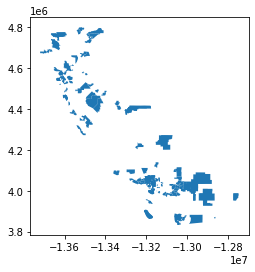

In [21]:
caother.plot()

In [26]:
mid = gpd.read_file("../nces_att_bound/SABS_1516_SchoolLevels/SABS_1516_Middle.shp")

In [27]:
camid = mid.loc[mid['stAbbrev'] == "CA"] 

In [32]:
camid

,SrcName,ncessch,schnam,leaid,gslo,gshi,defacto,stAbbrev,openEnroll,Shape_Leng,Shape_Area,level,MultiBdy,geometry
664,High Desert,060000109444,High Desert,0600001,06,08,0,CA,0,133901.224937,8.089787e+08,2,0,"POLYGON ((-13162468.047 4103989.263, -13161303..."
665,Not provided,060000199992,Unassigned,0600001,06,08,0,CA,0,12587.404553,9.853027e+06,2,0,"POLYGON ((-13171958.590 4087695.227, -13172297..."
666,White Hill Middle,060000608774,White Hill Middle,0600006,06,08,0,CA,0,33680.536686,5.291733e+07,2,0,"POLYGON ((-13646138.107 4582328.050, -13645719..."
667,None,060001109066,Fort Sage Middle,0600011,07,08,1,CA,0,209495.629862,1.173091e+09,2,0,"POLYGON ((-13391935.918 4887057.454, -13391294..."
668,Granite Oaks Middle,060001308257,Granite Oaks Middle,0600013,07,08,0,CA,0,27256.969129,3.577233e+07,2,0,"POLYGON ((-13502212.343 4698730.215, -13502074..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,Not provided,068450099992,Unassigned,0684500,06,08,0,CA,0,3865.605356,4.924421e+05,2,0,"POLYGON ((-13108157.116 3985955.951, -13107595..."
1949,Vista Verde MS,069113501028,Vista Verde Middle,0691135,06,08,0,CA,0,36647.194333,4.026465e+07,2,0,"POLYGON ((-13046321.494 4014840.255, -13046224..."
1950,Tomas Rivera MS,069113502468,Tomas Rivera Middle,0691135,06,08,0,CA,0,48620.930740,1.162637e+08,2,0,"POLYGON ((-13058884.868 4013713.362, -13058874..."
1951,Lakeside MS,069113511243,Lakeside Middle,0691135,07,08,0,CA,0,29863.756559,3.683337e+07,2,0,"POLYGON ((-13047610.468 4007961.306, -13047105..."


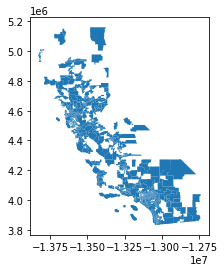

In [29]:
camid.plot()

In [33]:
high = gpd.read_file("../nces_att_bound/SABS_1516_SchoolLevels/SABS_1516_High.shp")

In [34]:
cahigh = high.loc[high['stAbbrev'] == "CA"] 

In [36]:
cahigh.shape

(1037, 14)

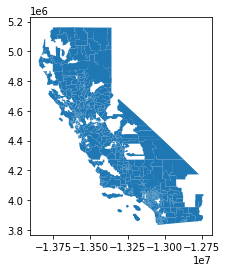

In [37]:
cahigh.plot()

how to link/conceptualize attendance zones as they relate to school districts and district policy?

Possible ways to link attribute data:

- name (not preferred, unlikely to be precise across data sets)
- ncessch
- leaid
- interpolation 